In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_val_score
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay

In [7]:
#Reading The Data
data =  pd.read_csv("spam_or_not_spam.csv")

In [8]:
data.shape

(3000, 2)

In [9]:
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [10]:
#Describing The Data
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
data.isnull().sum()

email    1
label    0
dtype: int64

In [12]:
#Removing Nan Value since only one nan value
data.dropna(inplace =  True)

In [13]:
#head of the data
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [14]:
#labels and mail
X =  data.iloc[:,0].values
y = data.iloc[:,-1].values

In [15]:
# return each mail to its original
nltk.download('stopwords')
corpus =[]
for i in range(len(X)):
    stemmer = PorterStemmer()
    X[i] = X[i].lower()
    X[i] = X[i].split()
    email =  [stemmer.stem(J) for J in X[i] ]
    email = ' '.join(email)
    corpus.append(email)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#convert to tokens array (Encoding)
v = CountVectorizer()
X = v.fit_transform(corpus).toarray()


In [17]:
#test_train split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2 , random_state = 42 )

# Training using KNN

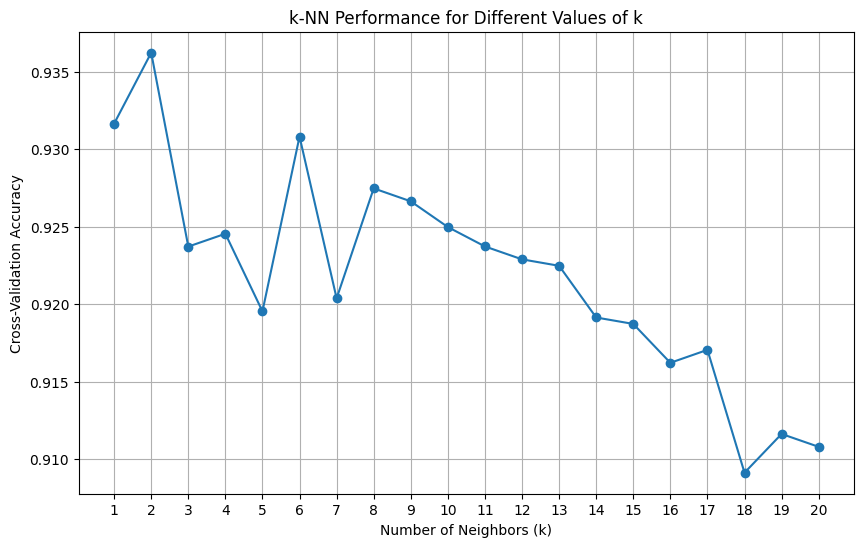

In [21]:
k_values = np.arange(1, 21)

# Empty lists to store the cross-validation scores for each k value
cv_scores = []

# Cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('k-NN Performance for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# we get best accuracy at k=2

In [22]:
# cross_val_score of knn
knn = KNeighborsClassifier(n_neighbors=2)
score_1 = cross_val_score(knn,X_train,y_train,cv = 10 )
score_1

array([0.90416667, 0.9375    , 0.94166667, 0.9375    , 0.94583333,
       0.95      , 0.9375    , 0.9375    , 0.95833333, 0.91213389])

In [29]:
#mean of score
score_1.mean()
acc_score_mat = {}

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
y_pred3 = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred3)
print(accuracy_knn)
acc_score_mat["KNN"] = accuracy_knn

0.9383333333333334


In [26]:
#classification report
cc3 =  classification_report(y_test,y_pred3)
print(cc3)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       500
           1       0.81      0.82      0.82       100

    accuracy                           0.94       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.94      0.94      0.94       600



[[481  19]
 [ 18  82]]


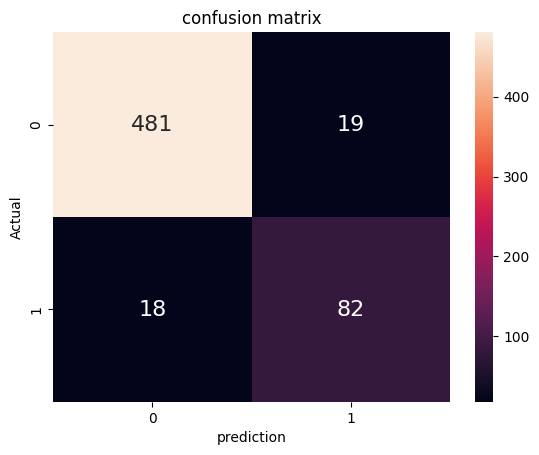

In [27]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred3)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
sns .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

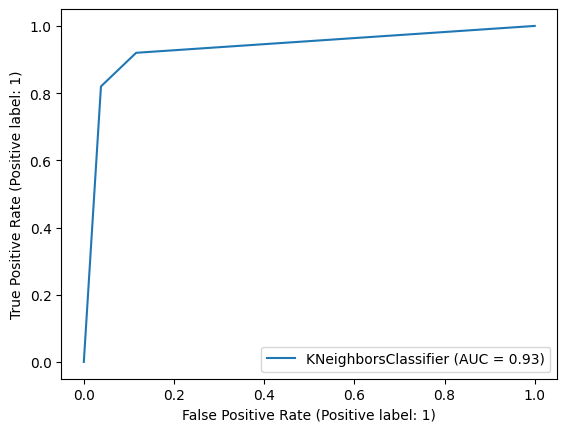

In [28]:
#Roc curve
RocCurveDisplay.from_estimator(knn,X_test,y_test)
plt.show()

#Training Model using Random Forest

In [ ]:
Random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [ ]:
y_pred =  Random.predict(X_test)

In [ ]:
# Hold out Validation
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
acc_score_mat["Random_Forest"]=accuracy

0.985


In [ ]:
#classification report
cc =  classification_report(y_test,y_pred)
print(cc)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       500
           1       0.98      0.93      0.95       100

    accuracy                           0.98       600
   macro avg       0.98      0.96      0.97       600
weighted avg       0.98      0.98      0.98       600



[[498   2]
 [  7  93]]


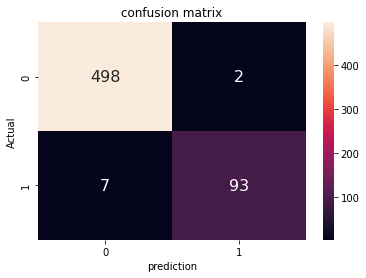

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


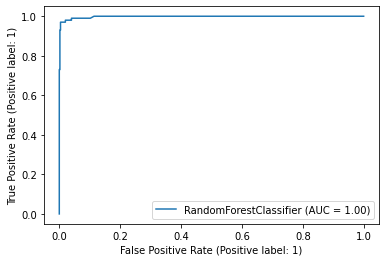

In [ ]:
#Roc curve
plot_roc_curve(Random,X_test,y_test)
plt.show()

#Training using Decision Tree

In [ ]:
Decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = Decision.predict(X_test)

In [ ]:
accuracy_dec = accuracy_score(y_test,y_pred2)
print(accuracy_dec)
acc_score_mat["Decision Tree"] = accuracy_dec

0.9666666666666667


In [ ]:
#classification report
cc2 =  classification_report(y_test,y_pred2)
print(cc2)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.87      0.94      0.90       100

    accuracy                           0.97       600
   macro avg       0.93      0.96      0.94       600
weighted avg       0.97      0.97      0.97       600



[[486  14]
 [  6  94]]


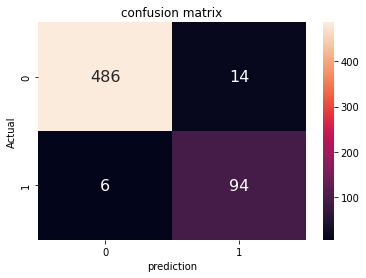

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred2)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


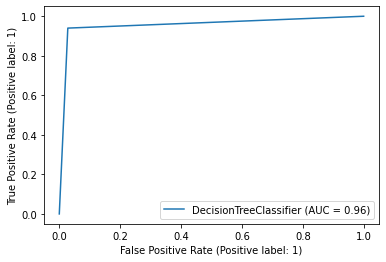

In [ ]:
#Roc curve
plot_roc_curve(Decision,X_test,y_test)
plt.show()

#Training using SVM

In [30]:
svc.fit(X_train,y_train)

NameError: ignored

In [31]:
y_pred4 = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test,y_pred4)
print(accuracy_svc)
acc_score_mat["SVC"] = accuracy_svc

NameError: ignored

In [ ]:
#classification report
cc4 =  classification_report(y_test,y_pred4)
print(cc4)


In [ ]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred4)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in range(2)],
                  columns = [i for i in range(2)])
seaborn .heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

In [ ]:
#Roc curve
plot_roc_curve(svc,X_test,y_test)
plt.show()

In [ ]:
acc_score_mat

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.bar(acc_score_mat.keys(),acc_score_mat.values(), color ='skyblue',width = 0.4)
plt.show()